In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
#warnings.filterwarning('ignore')
%matplotlib inline

In [22]:
df_train = pd.read_csv('houseprice/train.csv')

In [23]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [24]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\johnn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

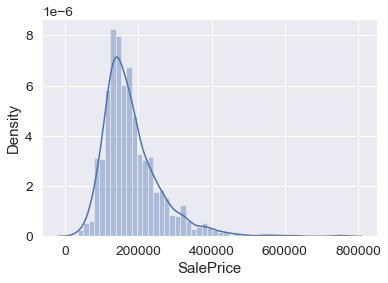

In [25]:
#historigrama
sns.distplot(df_train['SalePrice'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

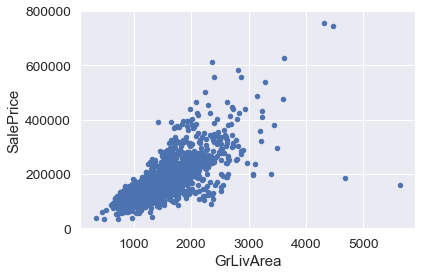

In [26]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

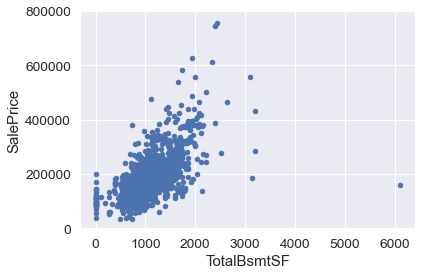

In [27]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

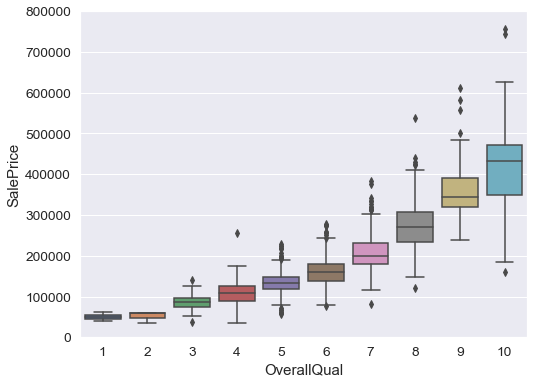

In [28]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

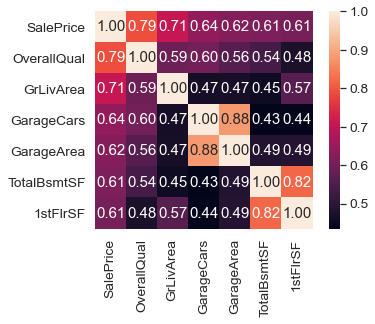

In [29]:
k = 7 #number of variables for heatmap
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [30]:
col_numeros = df_train.select_dtypes(include=[np.number])
corr = col_numeros.corr()

In [31]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [32]:
col_numeros.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')>

In [33]:
#VI UM VIDEO, SELECIONADO AS MELHORES FEATURES
from sklearn.feature_selection import SelectKBest, chi2

sem_na = col_numeros.dropna(axis=1)

features_list = ('MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold')
labels = sem_na['SalePrice']

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(sem_na, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)



Melhores features:
{'YrSold': inf, 'OverallCond': 5.729182913311292, 'PoolArea': 3.7562499761748405, 'GrLivArea': 3.4351103096307463, 'OverallQual': 3.285851693540355, 'GarageYrBlt': 2.8615943798189782, 'FullBath': 2.6788474817534706, 'GarageCars': 2.5833405627697603, '1stFlrSF': 2.3386201479608486, 'TotalBsmtSF': 2.3152897270846005, 'YearRemodAdd': 2.310197729370438, 'TotRmsAbvGrd': 1.873131648709872, 'MasVnrArea': 1.8276028386487766, 'BsmtFinSF1': 1.694718598730751, '2ndFlrSF': 1.6639925211697026}


C:\Users\johnn\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


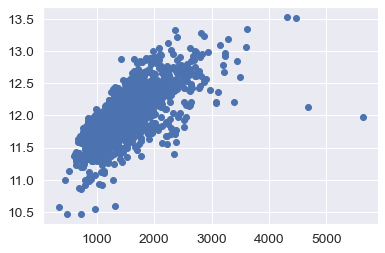

In [34]:
import matplotlib.pyplot as plt
plt.scatter(x=df_train['GrLivArea'], y=np.log(df_train['SalePrice']))
plt.show()

In [35]:
df_train['GrLivArea'].describe()

IQR = 1776.750000-1129.500000

LI = 1129.500000-1.5*IQR
LS = 1776.750000+1.5*IQR

print(LI)
print(LS)

df_train = df_train[df_train['GrLivArea'] <=4000]

158.625
2747.625


In [36]:
#tratar variaveis categorica e trasformar em númerica
categoricals = df_train.select_dtypes(exclude=[np.number])
categoricals.describe()

#rua deve ser um fator relavante pra decidir o preço de uma casa

df_train['street_n'] = pd.get_dummies(df_train['Street'],drop_first=True)
#test['street_n'] = pd.get_dummies(test['Street'],drop_first=True)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,street_n
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1


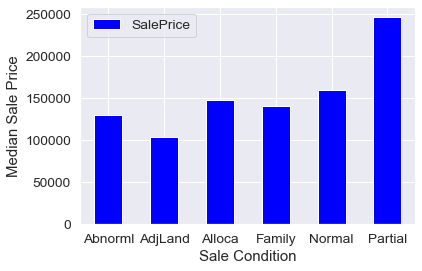

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,street_n,cond
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,1,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,1,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,1,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,1,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,1,1


In [37]:
#sales codition tbm parece uma variavel boa pra decidir o preço da casa

#grafico pra ver como essa variavel se distribui
condition_pivot = df_train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()
#Apenas o partial parece relevate, esse AdjLand é bem inferior, pode impactar.

df_train['SaleCondition'].value_counts()
#só tem 4 casos, irrelevante, podemos agrupar tudo exeto o "partial"

df_train.loc[df_train['SaleCondition'] == 'Partial','cond'] = 0
df_train.loc[df_train['SaleCondition'] != 'Partial','cond'] = 1

df_train['cond'] = df_train['cond'].astype(int)
df_train.head()

#vou incluir tbm o ano de construição, parece interessante, não precisa tratar, já é quantitativa

In [38]:
#será q o ano que vendeu é uma variavel relevante?
#YrSold

df_train['YrSold'].value_counts()
df_train['ano_venda'] = df_train['YrSold'].astype(int)
#não é, reduziu a assertividade, deve flutuar muito.

#LotConfig?

df_train['LotConfig'].value_counts()
df_train.loc[df_train['LotConfig'] == 'Inside','lot'] = 0
df_train.loc[df_train['LotConfig'] != 'Inside','lot'] = 1

df_train['lot'] = df_train['lot'].astype(int)
#aumentou o score!



In [39]:
#removendo os vazios

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1456 non-null   int64  
 1   MSSubClass     1456 non-null   int64  
 2   MSZoning       1456 non-null   object 
 3   LotFrontage    1197 non-null   float64
 4   LotArea        1456 non-null   int64  
 5   Street         1456 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1456 non-null   object 
 8   LandContour    1456 non-null   object 
 9   Utilities      1456 non-null   object 
 10  LotConfig      1456 non-null   object 
 11  LandSlope      1456 non-null   object 
 12  Neighborhood   1456 non-null   object 
 13  Condition1     1456 non-null   object 
 14  Condition2     1456 non-null   object 
 15  BldgType       1456 non-null   object 
 16  HouseStyle     1456 non-null   object 
 17  OverallQual    1456 non-null   int64  
 18  OverallC

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64
R^2 is: 
 0.8404734593748137
RMSE is: 
 0.027596612362539588


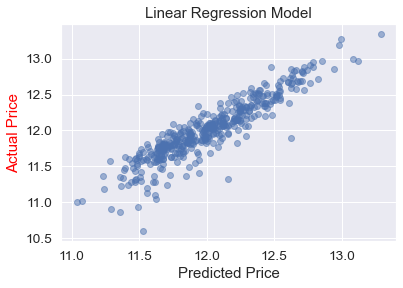

In [44]:
#modelo sem muito tratamento:

from sklearn import linear_model
from sklearn.model_selection import train_test_split


df_train = df_train.dropna(axis=1)

y = np.log(df_train.SalePrice)
print(y.head())

variaveis = ['GarageCars','GrLivArea','TotalBsmtSF','OverallQual','YearBuilt','street_n','cond','lot']

X = df_train[variaveis]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.3)

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
print("R^2 is: \n", model.score(X_test, y_test))

predictions = model.predict(X_test)

#nao sei o que é vamos estudar
from sklearn.metrics import mean_squared_error
print('RMSE is: \n', mean_squared_error(y_test, predictions))

actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.5,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price',color='red')
plt.title('Linear Regression Model')
plt.show()


In [45]:
#finalizado e testado o modelo, vamos aplicar na test e fazer a submission
#igualando a test

test = pd.read_csv('houseprice/test.csv')
#criando a 'street_n','cond','lot'

test['LotConfig'].value_counts()
test.loc[test['LotConfig'] == 'Inside','lot'] = 0
test.loc[test['LotConfig'] != 'Inside','lot'] = 1

test['lot'] = test['lot'].astype(int)

test.loc[test['SaleCondition'] == 'Partial','cond'] = 0
test.loc[test['SaleCondition'] != 'Partial','cond'] = 1

test['cond'] = test['cond'].astype(int)

test['street_n'] = pd.get_dummies(test['Street'],drop_first=True)

base_fim = pd.DataFrame(test['Id'])
df_test = test[variaveis].interpolate()
df_test.head()

#predições

test_pred = model.predict(df_test)
#como ele previu os valores com log, devemos voltar ao numero normal
test_pred = np.exp(test_pred)
test_pred


array([112405.93843791, 153960.66086704, 162490.5422783 , ...,
       141426.26109939, 114243.96122813, 233547.63184906])

In [50]:
#base final para submission

base_fim['SalePrice'] = test_pred
base_fim.head()
base_fim.to_csv('houseprice/house_prices_vfinal.csv',index=False)